In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

pd.set_option("display.max_rows", None, "display.max_columns", None)

# Einlesen von csv, xlsx und json Dateien

In [2]:
csv_df = pd.read_csv("Melbourne_Housing.csv", index_col = False, nrows= 10, usecols=[0,1,2,3,4,5], skiprows=1)
# header = None => Kopfzeile wird nicht eingelesen
# index_col = False => Die erste Spalte wird nicht als Index eingelesen


xlsx_df = pd.read_excel("diabetes.xlsx", sheet_name = 1, index_col = None, dtype={"gtt" : float, "bmi" : float}, skiprows= 1, header = 1)

# sheet_name = 1 => Welches Excel Blatt man haben moechte
# index_col = None => Spalte als Index auswaehlen
# dtype={"spalte": datentyp} => Defnieren des Datentypes einer Spalte
# skiprows = 1 => Anzahl Zeilen die man ueberspringt
# nrows = 10 => Anzahl Zeilen die eingelesen werden
# json_df = pd.read_json("Test")

In [3]:
xlsx_df["insulin"] = xlsx_df["insulin"].replace({0: np.nan})

xlsx_df["flag_row_complete"] = xlsx_df.notna().all(axis = 1)

xlsx_df = xlsx_df.sort_values("flag_row_complete", ascending = True)
df_normal = xlsx_df.copy()

# Na Werte finden, DataFrame bereinigen, Imputiationen

## Imputations Strategien

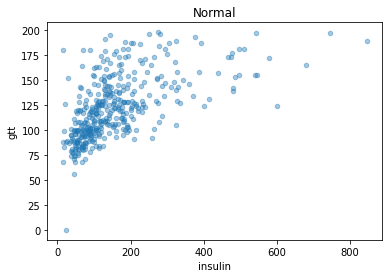

In [4]:
df_normal.plot(x = "insulin", y = "gtt", kind = "scatter", title = "Normal", alpha = 0.4)
plt.show()

df_knn = df_normal.copy()

In [8]:
headers = df_normal.columns
impute_knn = KNNImputer(n_neighbors=2)
df_knn = impute_knn.fit_transform(df_knn)

df_knn = pd.DataFrame(df_knn)
df_knn.columns = headers

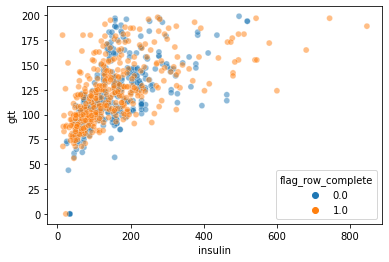

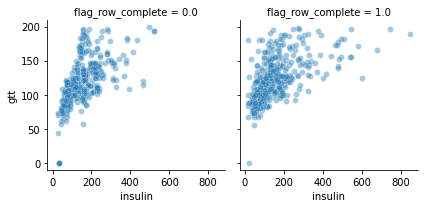

In [15]:
sns.scatterplot(data = df_knn, x = "insulin", y = "gtt", hue = "flag_row_complete", alpha = 0.5)
grid = sns.FacetGrid(data = df_knn, col = "flag_row_complete")
grid.map(sns.scatterplot, "insulin", "gtt", alpha = 0.4)

In [11]:
df_iter = df_normal.copy()
impute_it = IterativeImputer()
df_iter = impute_it.fit_transform(df_iter)

df_iter = pd.DataFrame(df_iter)
df_iter.columns = headers

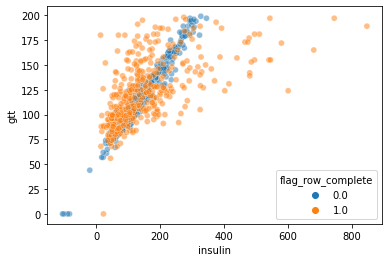

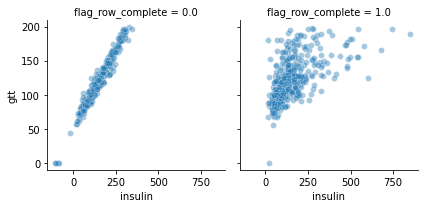

In [16]:
sns.scatterplot(data = df_iter, x = "insulin", y = "gtt", hue = "flag_row_complete", alpha = 0.5, )
grid = sns.FacetGrid(data = df_iter, col = "flag_row_complete")
grid.map(sns.scatterplot, "insulin", "gtt", alpha = 0.4)

In [ ]:
# Wie Na Werte in einer Zeile Finden? 
# Durch erstellen einer row_complete_flag wissen wir dann, ob die Zeile vollstaendig ist oder nicht. 
csv_df['row_complete_flag'] = csv_df.notna().all(axis=1)

# Durch isna() Methode
csv_df.isna()

# Na Values ersetzen mit einem Wert
df_fillna = csv_df.fillna("Missing Value")

# Fehlende Werte mit interpolate() ersetzen
df_inter_bary = csv_df.interpolate(method = "barycentric")

# Fehlende Werte mit der replace() Methode ersetzen
csv_df.replace({NaN : })
# Fehlende Werte entfernen (Zeile entfernen die Na Werte aufweisen)
#csv_df.dropna()

